In [230]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

In [231]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [232]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [233]:
data_norm = normalize(data)

data_norm = pd.DataFrame(data_norm, columns=data.columns)
data_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [234]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


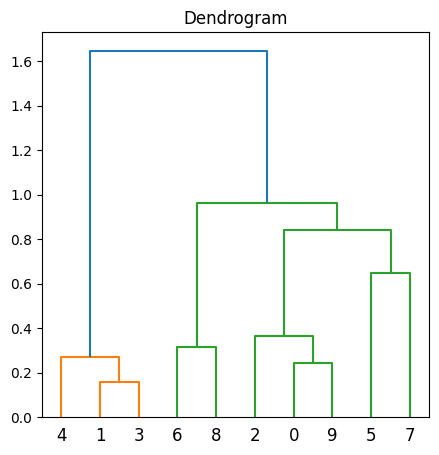

In [235]:
## dendrogram
subset_data = data_norm.sample(n=10)
plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))

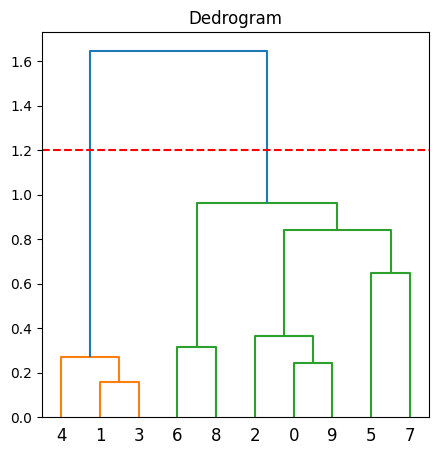

In [236]:
## break
plt.figure(figsize=(5,5))
plt.title('Dedrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method="ward"))
plt.axhline(y=1.2, color= "red", linestyle="--")

In [237]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data_norm)

In [238]:
reduced_data

array([[ 3.40370496e-02, -1.80420878e-01],
       [ 3.51057368e-01, -4.66441613e-02],
       [ 3.05375430e-01,  5.55510662e-02],
       [-3.83677396e-01,  1.61789121e-01],
       [-3.18591263e-01, -7.69700156e-02],
       [ 3.73478459e-02, -1.19851588e-01],
       [-1.20176243e-01, -2.43275779e-01],
       [ 2.39772413e-01, -1.04149634e-01],
       [ 1.65698845e-01, -1.87946102e-01],
       [ 5.68883753e-01, -1.09187885e-01],
       [ 5.50490278e-01,  8.66514506e-02],
       [-3.80404330e-01, -1.63301699e-01],
       [-2.16997115e-01, -2.19645753e-01],
       [-4.15793549e-02, -1.73397544e-01],
       [-1.33933983e-01, -2.36377213e-01],
       [-3.35298752e-01, -2.30915370e-01],
       [ 7.26283916e-01, -7.33583822e-02],
       [ 5.14896222e-02,  7.05034152e-03],
       [-1.39371504e-01, -1.51057486e-01],
       [ 1.64608998e-01, -2.12412480e-01],
       [-3.33835807e-01, -1.80358027e-01],
       [-3.23995148e-01,  2.39147842e-01],
       [-4.98705749e-01,  4.14682390e-02],
       [ 2.

In [239]:
## train model
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

now = cluster.fit_predict(reduced_data)

Text(0.5, 1.0, 'Scatter plot of wholesales data')

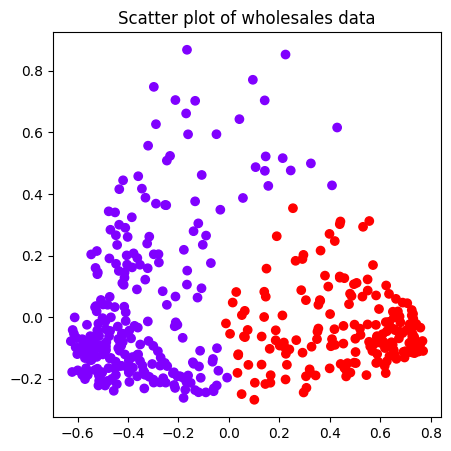

In [240]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data[:,0],y = reduced_data[:,1], c=cluster.labels_, cmap='rainbow' )
plt.title('Scatter plot of wholesales data')

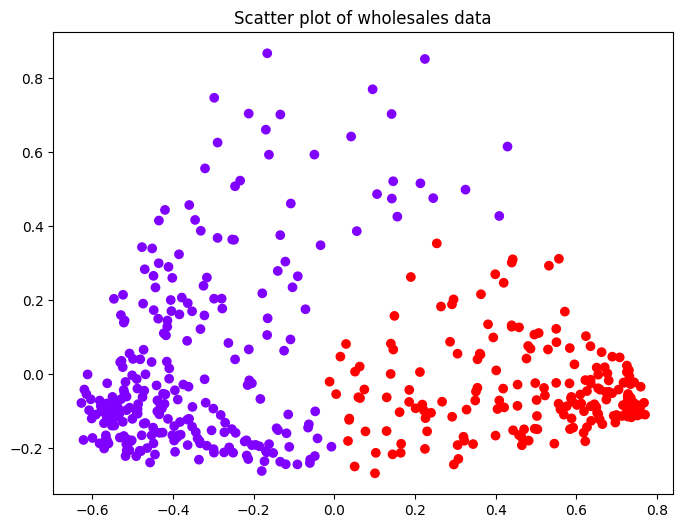

Cluster 0: 255 data points
Cluster 1: 185 data points


In [241]:
# Assuming reduced_data and cluster are already defined
# train model
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
now = cluster.fit_predict(reduced_data)

# Count the number of data points in each cluster
unique_labels, counts = np.unique(cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of wholesales data')
plt.show()

# Print the counts of data points in each cluster
for label, count in cluster_counts.items():
    print(f'Cluster {label}: {count} data points')

In [242]:
df = pd.DataFrame({'reduced_cluster': now})
df

,reduced_cluster
0,1
1,1
2,1
3,0
4,0
...,...
435,0
436,0
437,1
438,0
